## Online Payments Fraud Detection Dataset Case Study 



### Introduction
- These days banking transactions are mostly done online which affords customers speed and convenience. However, it has also afforded a faster way for customers funds to be lost to fraud. There is therefore the need for financial institutions to have systems that can track suspicious transactions online realtime. 
### Objective
 - To develop a machine learning model that can predict online payment fraud transactions from a dataset. 
- The model will enable the detection and isolation of potential fraudulent transactions for further review and verification. 

### Exploratory Data Analysis

In [3]:
# import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
# load and read dataset

on_df = pd.read_csv(r'C:\Users\chulu\OneDrive\Documents\January Cohort - Python\DS Project\Online Payment Fraud Detection.csv')

In [5]:
# Get a feel of the dataset by looking at the first five rows
on_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


#### The features of the dataset explained

- step - represents a unit of time where 1 step equals 1 hour
- type - type of online transaction
- amount - the amount of the transaction
- nameOrig -  customer starting the transaction
- oldbalanceOrg - balance before the transaction
- newbalanceOrig - balance after the transaction
- nameDest - recipient of the transaction
- oldbalanceDest - initial balance of recipient before the transaction
- newbalanceDest -  the new balance of the recipient after the transaction
- isFraud - fraud transaction

In [6]:
# A bit more about the features: what are the data types

on_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [7]:
# How many rows and columns does the dataset have

on_df.shape

(1048575, 10)

##### There are 1,048,575 rows and 10 columns

In [50]:
# Useful statistical information

on_df.describe().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,typenum
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,158666,874009,893808,978160,1114197,0,2
std,15,264940,2971750,3008271,2296780,2416593,0,0
min,1,0,0,0,0,0,0,1
25%,15,12149,0,0,0,0,0,1
50%,20,76343,16002,0,126377,218260,0,2
75%,39,213761,136642,174599,915923,1149807,0,3
max,95,10000000,38900000,38900000,42100000,42200000,1,5


In [9]:
# Are there missing values in the dataset?

on_df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

##### 
- As indicated above, there is no missing value in the dataset.

In [10]:
# See if there are duplicates

on_df.duplicated().sum()

0

##### 
- There are no duplicates

##### Analysing the features
- for the purpose of analysing the features we will create categories for step, amount, oldbalanceOrg, oldbalanceDest
- we will create another column to display 'isFraud' column in categorical terms where 1 will be represented as 'Fraud' transaction and 0 represented as 'Genuine' transaction. 


In [11]:
# categorizing step

def stepx(x):
    if x <= 20:
        return 'very quick'
    elif x <= 40:
        return 'quick'
    elif x <= 60:
        return 'moderate'
    elif x <= 80:
        return 'slow'
    else:
        return 'very slow'

on_df['step_category'] = on_df['step'].apply(stepx)

# categorizing amount

def amountx(x):
    if x <= 20000:
        return 'very low'
    elif x <= 100000:
        return 'low'
    elif x <= 2000000:
        return 'moderate'
    elif x <= 5000000:
        return 'high'
    else:
        return 'very high'

on_df['amt_category'] = on_df['amount'].apply(amountx)

# categorizing oldbalanceOrg

def oldbalanceOrgx(x):
    if x <= 20000:
        return 'very low'
    elif x <= 100000:
        return 'low'
    elif x <= 2000000:
        return 'moderate'
    elif x <= 5000000:
        return 'high'
    else:
        return 'very high'

on_df['oldbalorig_category'] = on_df['oldbalanceOrg'].apply(oldbalanceOrgx) 

# categorizing oldbalanceDest

def oldbalanceDestx(x):
    if x <= 20000:
        return 'very low'
    elif x <= 100000:
        return 'low'
    elif x <= 2000000:
        return 'moderate'
    elif x <= 5000000:
        return 'high'
    else:
        return 'very high'

on_df['oldbaldest_category'] = on_df['oldbalanceDest'].apply(oldbalanceDestx) 

# categorizing isFraud 

def isFraudx(x):
    if x == 1:
        return 'fraud'
    else:
        return 'genuine'
    
# create the new column

on_df['trans_category'] = on_df['isFraud'].apply(isFraudx)  

on_df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,step_category,amt_category,oldbalorig_category,oldbaldest_category,trans_category
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,very quick,very low,moderate,very low,genuine
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,very quick,very low,low,very low,genuine
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,very quick,very low,very low,very low,fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,very quick,very low,very low,low,fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,very quick,very low,low,very low,genuine


#### Univariate Analysis

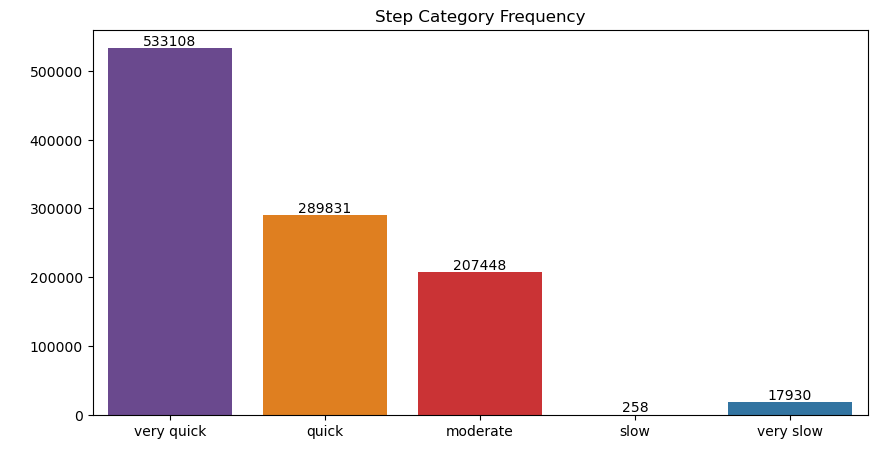

very quick    50.84
quick         27.64
moderate      19.78
very slow      1.71
slow           0.02
Name: step_category, dtype: float64


In [51]:
# step

plt.figure(figsize=(10, 5))
stepviz = sns.countplot(x='step_category', data=on_df, palette='Paired_r')
for container in stepviz.containers:
    stepviz.bar_label(container)
plt.title('Step Category Frequency')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

# in percentage

steppercent = on_df['step_category'].value_counts() / on_df.shape[0] * 100
print(round(steppercent, 2))

#### 
- More than half of the transactions were processed very quickly within 1 to 20 steps. The implication for fraud transactions is that funds would be lost very quickly with very little time for recovery. 

CASH_OUT    35.6
PAYMENT     33.7
CASH_IN     21.7
TRANSFER     8.3
DEBIT        0.7
Name: type, dtype: float64


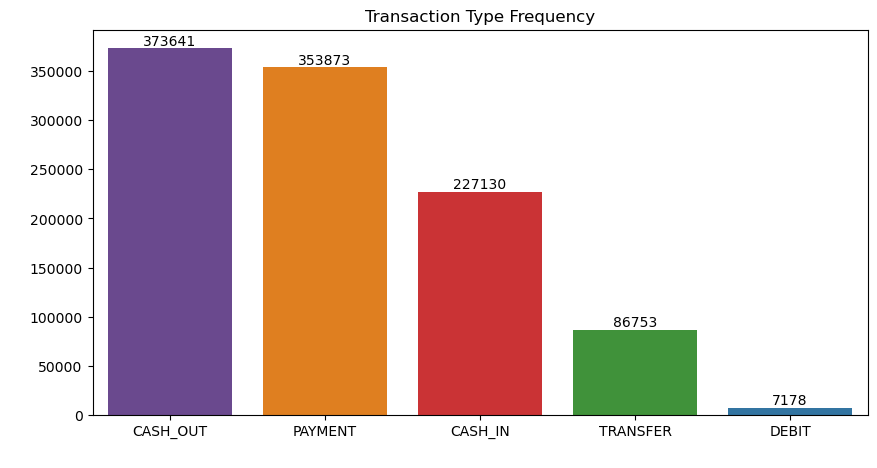

In [13]:
# type

# in percentage
typepercent = on_df['type'].value_counts() / on_df.shape[0] * 100
print(round(typepercent, 1))

plt.figure(figsize=(10, 5))
typecalc = on_df['type'].value_counts().sort_values(ascending=False)
typeviz = sns.barplot(x=typecalc.index, y=typecalc.values, data=on_df, palette= 'Paired_r')
for container in typeviz.containers:
    typeviz.bar_label(container)
plt.title('Transaction Type Frequency')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()


##### 
- Cash_Out with 35.6% was the most utilised transaction type followed by Payment (33.7%), Cash_In (21.7%), Transfer(8.3%) and Debit(0.7%). 

moderate     44.76
very low     33.31
low          21.61
high          0.30
very high     0.01
Name: amt_category, dtype: float64


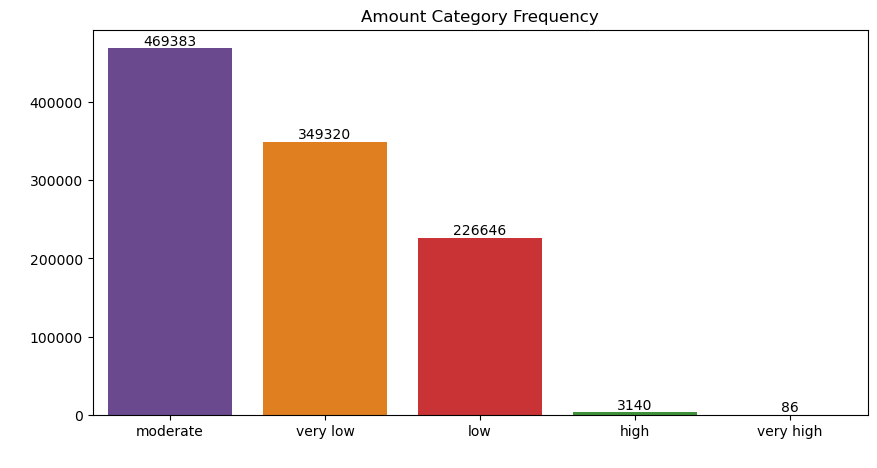

In [14]:
# amount

# in percentage
amtpercent = on_df['amt_category'].value_counts() / on_df.shape[0] * 100
print(round(amtpercent, 2))

plt.figure(figsize=(10, 5))
amtcalc = on_df['amt_category'].value_counts().sort_values(ascending=False)
amtviz = sns.barplot(x=amtcalc.index, y=amtcalc.values, data=on_df, palette= 'Paired_r')
for container in amtviz.containers:
    amtviz.bar_label(container)
plt.title('Amount Category Frequency')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

##### 
- 44.76% percent of the transactions were amounts of 100,001 to 2,000,000 while 33.31% were 20,000 and below. Only 0.01% of the transactions were above 5,000,000.
- Considering the very low percentage of very high volume transactions, 100% review of these transactions can be done regardless of whether the proposed fraud detection model classify them as fraud or genuine because of the huge amounts.

In [15]:
# nameOrig - customer starting the transaction

nameOrig_count = on_df['nameOrig'].value_counts().sort_values(ascending = False)
nameOrig_count

C1214450722    2
C443816828     2
C645536800     2
C301090204     2
C563955235     2
              ..
C911141114     1
C91545766      1
C1296046658    1
C1981052058    1
C1264356443    1
Name: nameOrig, Length: 1048317, dtype: int64

####
- There are 1,048,317 customers that initiated transactions and none of the customers did more than two transactions.

very low     51.8
low          19.6
moderate     18.8
very high     5.9
high          3.9
Name: oldbalorig_category, dtype: float64


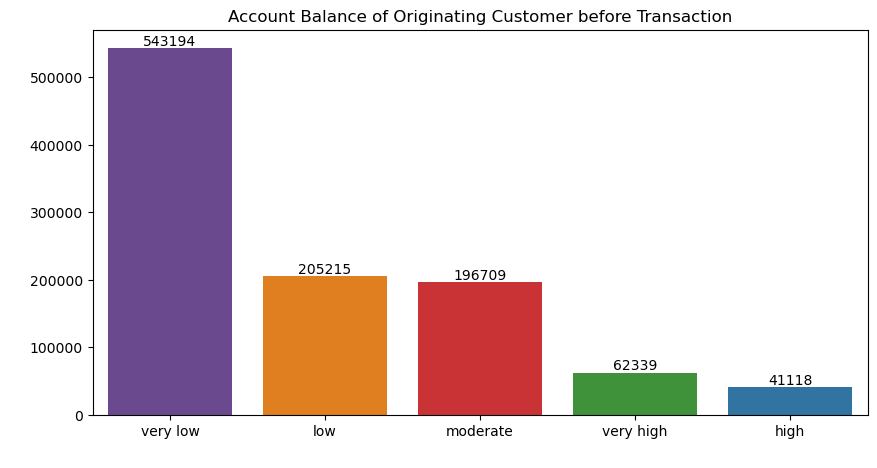

In [16]:
# oldbalanceOrg - Account Balance of Originating Customer before Transaction  

# in percentage
oldbalorigpercent = on_df['oldbalorig_category'].value_counts() / on_df.shape[0] * 100
print(round(oldbalorigpercent, 1))

plt.figure(figsize=(10, 5))
oldbalorigcalc = on_df['oldbalorig_category'].value_counts().sort_values(ascending=False)
oldbalorigviz = sns.barplot(x=oldbalorigcalc.index, y=oldbalorigcalc.values, data=on_df, palette= 'Paired_r')
for container in oldbalorigviz.containers:
    oldbalorigviz.bar_label(container)
plt.title('Account Balance of Originating Customer before Transaction')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

####
- Over 50% of the pre-transaction account balances of the customers that initiated the transactions fell into the very low category of 20,000 and below.

In [17]:
# nameDest - beneficiary customers

nameDest_count = on_df['nameDest'].value_counts().sort_values(ascending = False)
nameDest_count

C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
               ..
M1355720874     1
M659911196      1
M1494976559     1
M2124442850     1
M677577406      1
Name: nameDest, Length: 449635, dtype: int64

####
- There are 449,635 destination customers. The number of transactions per destination customer was from 1 to 98.
- While the maximum transactions count per initiating customer is 2, that of beneficiary customer is as much as 98. This is a mismatch. Situations where a single beneficiary receives funds from several senders are usually suspicious, moreso where the transactions happen within a short space of time. 

very low     43.8
moderate     37.8
high          9.1
low           4.8
very high     4.5
Name: oldbaldest_category, dtype: float64


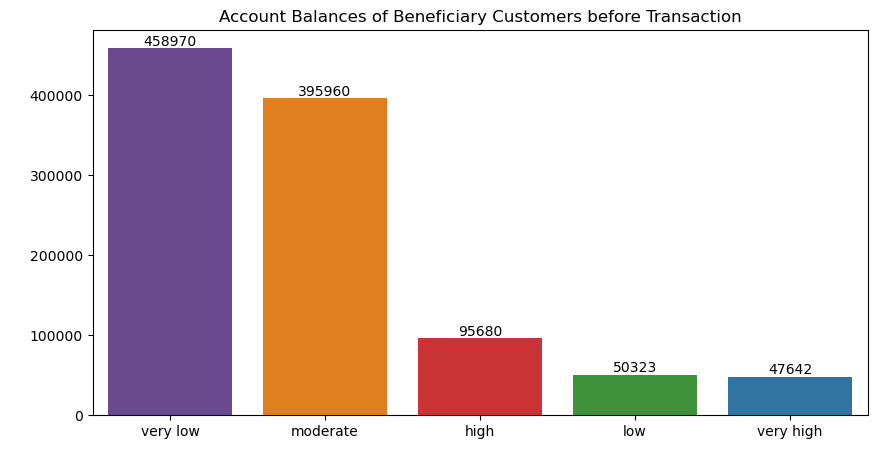

In [18]:
# oldbalanceDest - Account Balances of Beneciary Customers before Transaction  

# in percentage
oldbaldestpercent = on_df['oldbaldest_category'].value_counts() / on_df.shape[0] * 100
print(round(oldbaldestpercent, 1))

plt.figure(figsize=(10, 5))
oldbaldestcalc = on_df['oldbaldest_category'].value_counts().sort_values(ascending=False)
oldbaldestviz = sns.barplot(x=oldbaldestcalc.index, y=oldbaldestcalc.values, data=on_df, palette= 'Paired_r')
for container in oldbaldestviz.containers:
    oldbaldestviz.bar_label(container)
plt.title('Account Balances of Beneficiary Customers before Transaction')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

####
- Prior to the transactions, more of the  account balances of the beneficiary customers were in the very low category of 20,000 and below and moderate category of amounts from 100,001 to 2,000,000. Beneficiary account balances of more than 5,000,000 were the least with 4.5%.

genuine    99.9
fraud       0.1
Name: trans_category, dtype: float64


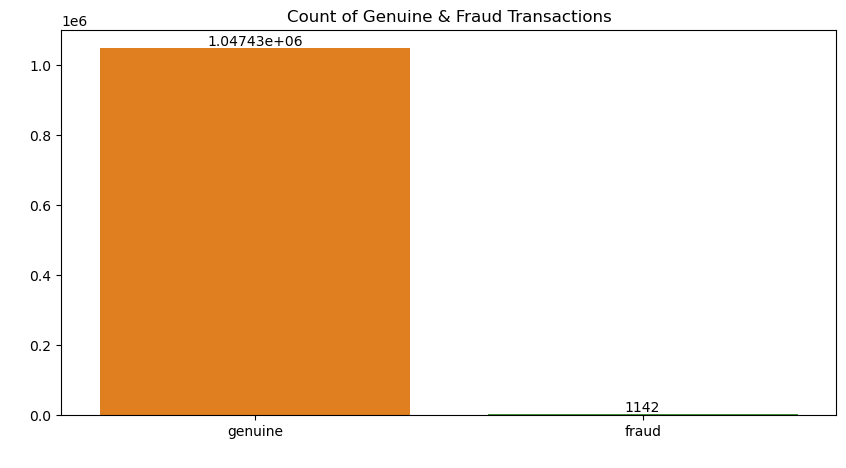

In [19]:
# isFraud - Genuine and Fraud Transactions

# in percentage
isfraudpercent = on_df['trans_category'].value_counts() / on_df.shape[0] * 100
print(round(isfraudpercent, 1))

plt.figure(figsize=(10, 5))
isfraudcalc = on_df['trans_category'].value_counts().sort_values(ascending=False)
isfraudviz = sns.barplot(x=isfraudcalc.index, y=isfraudcalc.values, data=on_df, palette= 'Paired_r')
for container in isfraudviz.containers:
    isfraudviz.bar_label(container)
plt.title('Count of Genuine & Fraud Transactions')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

####
- 99.9% (1,047,433) of the transactions are genuine and 0.1% (1,142) are fraudulent. 

#### Bivariate Analysis

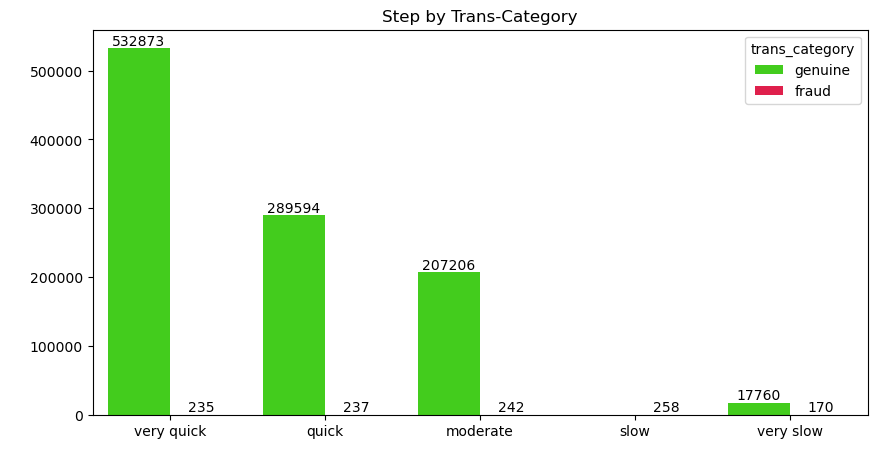

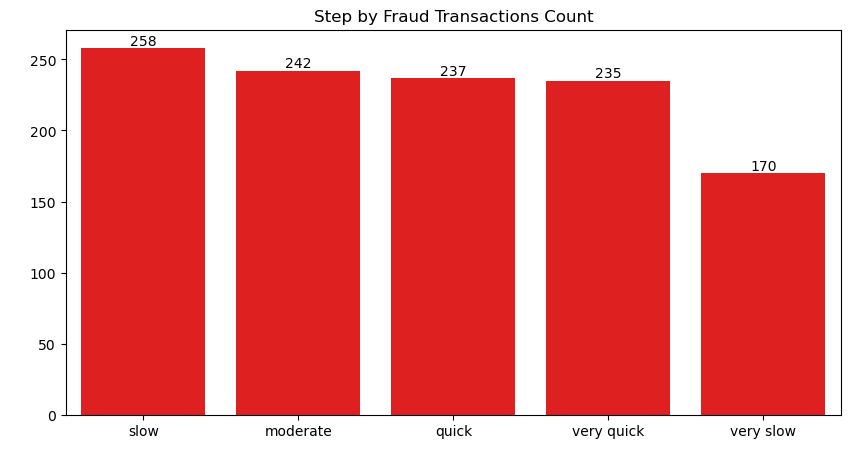

In [20]:
# Step by Fraud Transactions
plt.figure(figsize = (10, 5))
plt.title('Step by Trans-Category')
stepbyfraud = sns.countplot(x = 'step_category', data = on_df, hue = 'trans_category', palette='prism')
for container in stepbyfraud.containers:
    stepbyfraud.bar_label(container)
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

plt.figure(figsize=(10, 5))
stepbyfraud1 = on_df[on_df['trans_category']=='fraud']
stepbyfraud2 = stepbyfraud1['step_category'].value_counts().sort_values(ascending=False)
stepbyfraudviz = sns.barplot(x = stepbyfraud2.index, y= stepbyfraud2.values, data=on_df, color='red')
for container in stepbyfraudviz.containers:
    stepbyfraudviz.bar_label(container)
plt.title('Step by Fraud Transactions Count')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

#### 
- Step range 61 to 80 had the highest count of fraudulent transactions and all the transactions processed within this step range were fraudulent.

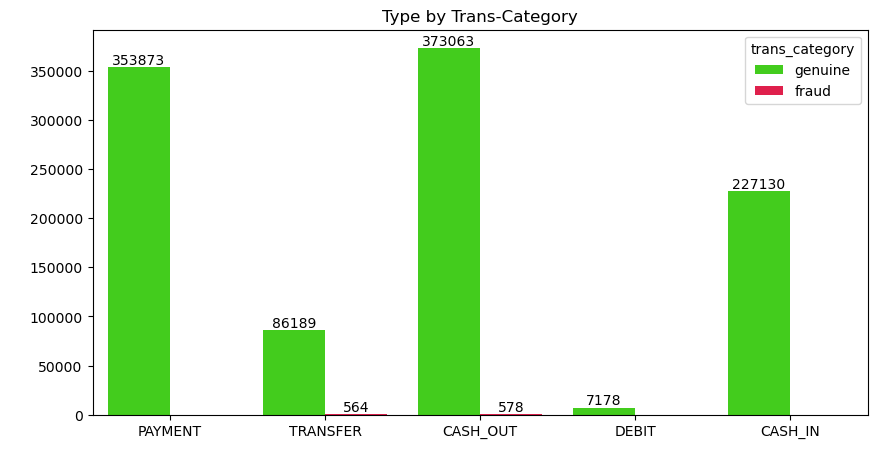

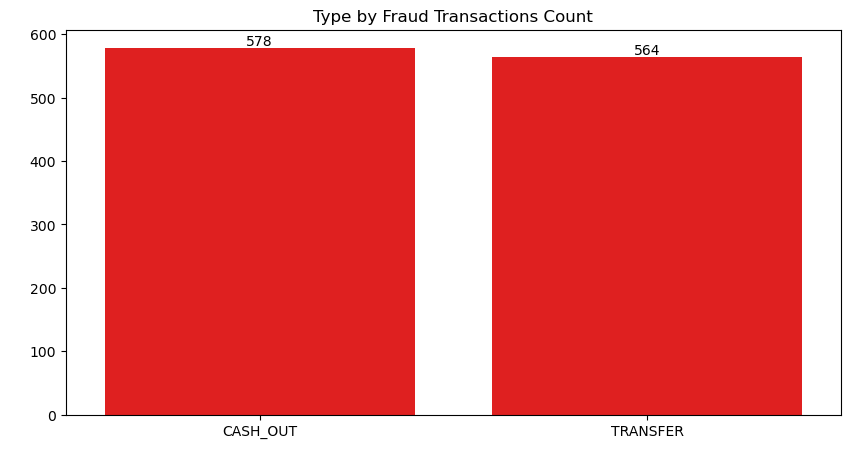

In [21]:
# Type by Fraud Transactions
plt.figure(figsize = (10, 5))
plt.title('Type by Trans-Category')
typebytcat = sns.countplot(x = 'type', data = on_df, hue = 'trans_category', palette='prism')
for container in typebytcat.containers:
    typebytcat.bar_label(container)
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

plt.figure(figsize=(10, 5))
typebytcat1 = on_df[on_df['trans_category']=='fraud']
typebytcat2 = typebytcat1['type'].value_counts().sort_values(ascending=False)
typebytcatviz = sns.barplot(x = typebytcat2.index, y= typebytcat2.values, data=on_df, color='red')
for container in typebytcatviz.containers:
    typebytcatviz.bar_label(container)
plt.title('Type by Fraud Transactions Count')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

##### 
- 50.6% of the fraud transactions were carried out through Cash-Out and 49.4% through Transfer. There were no fraud transactions on Payment, Debit and Cash_In transactions types.
####
- It is quite significant that while Transfer made up only 8.3% of the total transactions, 49.4% of the fraud transactions were processed through this transaction type. 


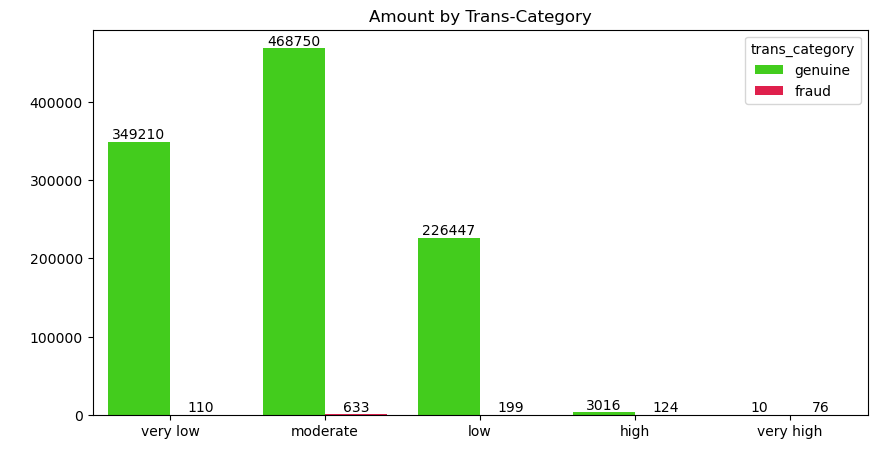

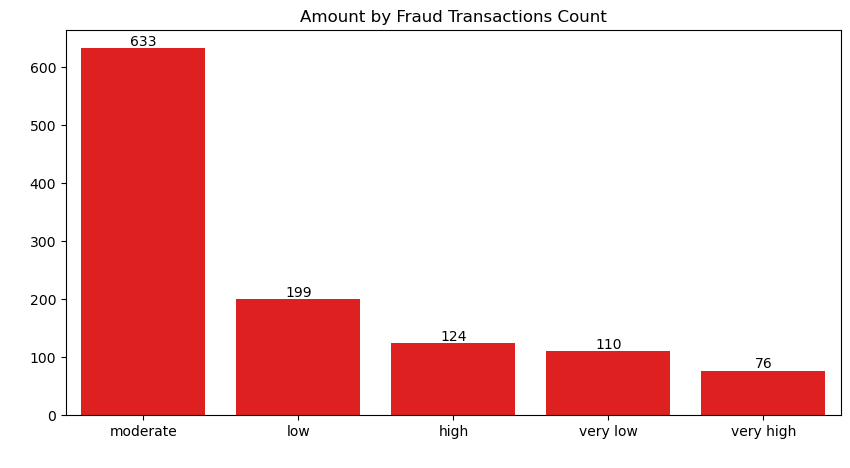

In [22]:
# Amount by Fraud Transactions
plt.figure(figsize = (10, 5))
plt.title('Amount by Trans-Category')
amtbytcat = sns.countplot(x = 'amt_category', data = on_df, hue = 'trans_category', palette='prism')
for container in amtbytcat.containers:
    amtbytcat.bar_label(container)
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()


plt.figure(figsize=(10, 5))
amtbyfraud1 = on_df[on_df['trans_category']=='fraud']
amtbyfraud2 = amtbyfraud1['amt_category'].value_counts().sort_values(ascending=False)
amtbyfraudviz = sns.barplot(x = amtbyfraud2.index, y= amtbyfraud2.values, data=on_df, color='red')
for container in amtbyfraudviz.containers:
    amtbyfraudviz.bar_label(container)
plt.title('Amount by Fraud Transactions Count')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

####
- Transaction amounts of 100,001 to 2,000,000 are more likely to be fraudulent as the highest number of frauds occurred within this amount range. 

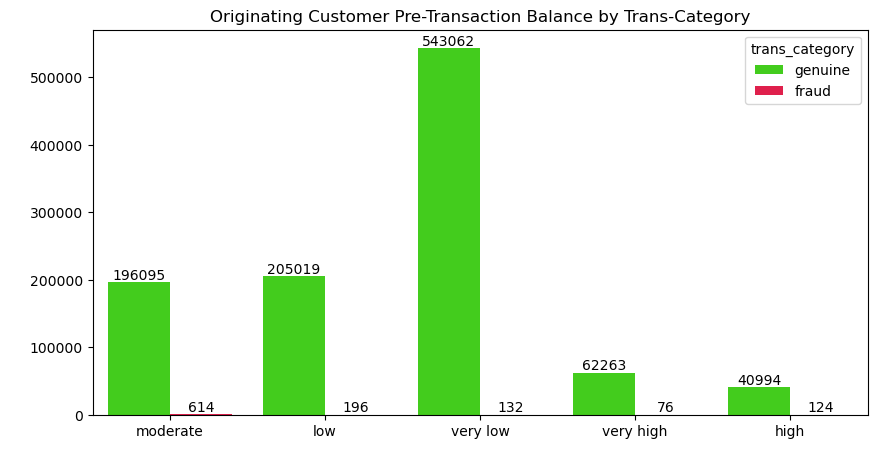

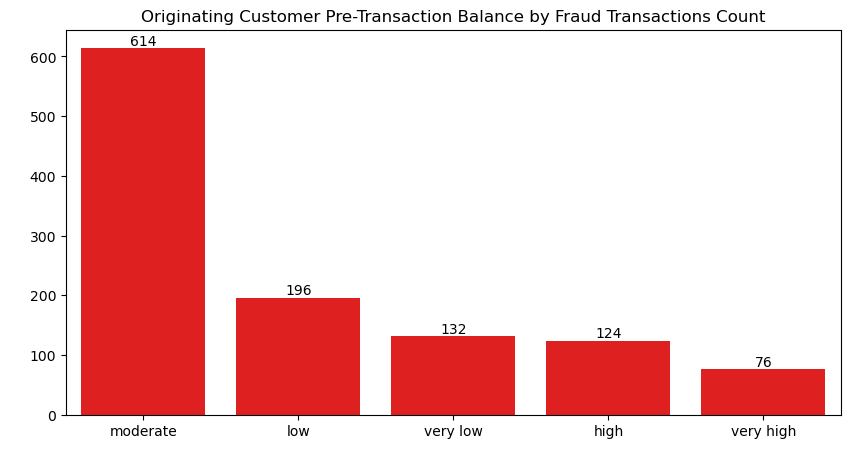

In [23]:
# oldbalanceOrg by Fraud Transactions
plt.figure(figsize = (10, 5))
plt.title('Originating Customer Pre-Transaction Balance by Trans-Category')
oldbalorigbytcat = sns.countplot(x = 'oldbalorig_category', data = on_df, hue = 'trans_category', palette='prism')
for container in oldbalorigbytcat.containers:
    oldbalorigbytcat.bar_label(container)
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()


plt.figure(figsize=(10, 5))
oldbalorigbyfraud1 = on_df[on_df['trans_category']=='fraud']
oldbalorigbyfraud2 = oldbalorigbyfraud1['oldbalorig_category'].value_counts().sort_values(ascending=False)
oldbalorigbyfraudviz = sns.barplot(x = oldbalorigbyfraud2.index, y= oldbalorigbyfraud2.values, data=on_df, color='red')
for container in oldbalorigbyfraudviz.containers:
    oldbalorigbyfraudviz.bar_label(container)
plt.title('Originating Customer Pre-Transaction Balance by Fraud Transactions Count')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

####
- Though account balances of transaction originating customers in the moderate category (i.e. 100,001 to 2,000,000) make up 18.8% of the account balances, 53.8% of the fraud transactions occurred on this category.  

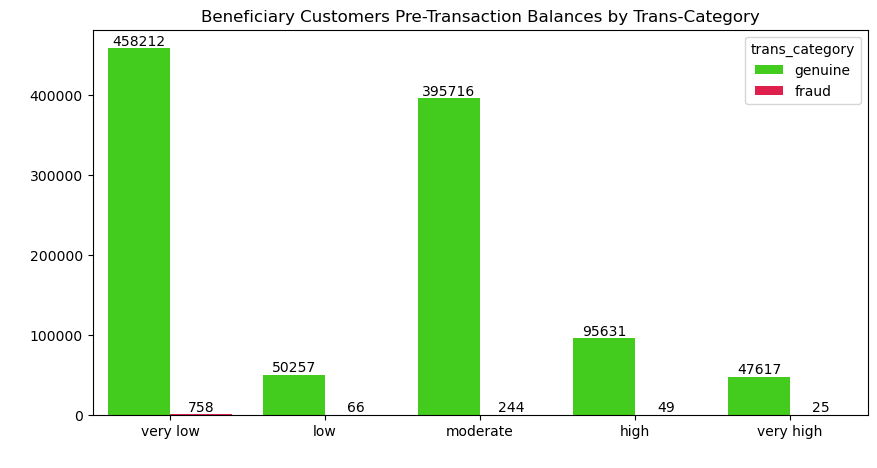

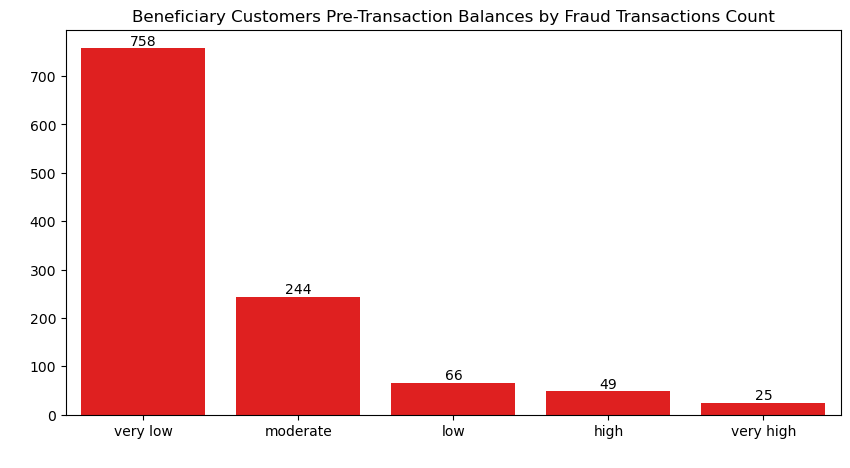

In [24]:
# oldbalanceDest by Fraud Transactions

plt.figure(figsize = (10, 5))
plt.title('Beneficiary Customers Pre-Transaction Balances by Trans-Category')
oldbaldestbytcat = sns.countplot(x = 'oldbaldest_category', data = on_df, hue = 'trans_category', palette='prism')
for container in oldbaldestbytcat.containers:
    oldbaldestbytcat.bar_label(container)
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()


plt.figure(figsize=(10, 5))
oldbaldestbyfraud1 = on_df[on_df['trans_category']=='fraud']
oldbaldestbyfraud2 = oldbaldestbyfraud1['oldbaldest_category'].value_counts().sort_values(ascending=False)
oldbaldestbyfraudviz = sns.barplot(x = oldbaldestbyfraud2.index, y= oldbaldestbyfraud2.values, data=on_df, color='red')
for container in oldbaldestbyfraudviz.containers:
    oldbaldestbyfraudviz.bar_label(container)
plt.title('Beneficiary Customers Pre-Transaction Balances by Fraud Transactions Count')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

####
- Customers with very low account balances (i.e. 20,000 and below) were the highest recipients of fraud transactions accounting for 66.4% of the fraudulent inflows.  

#### Multivariate Analysis

<AxesSubplot:>

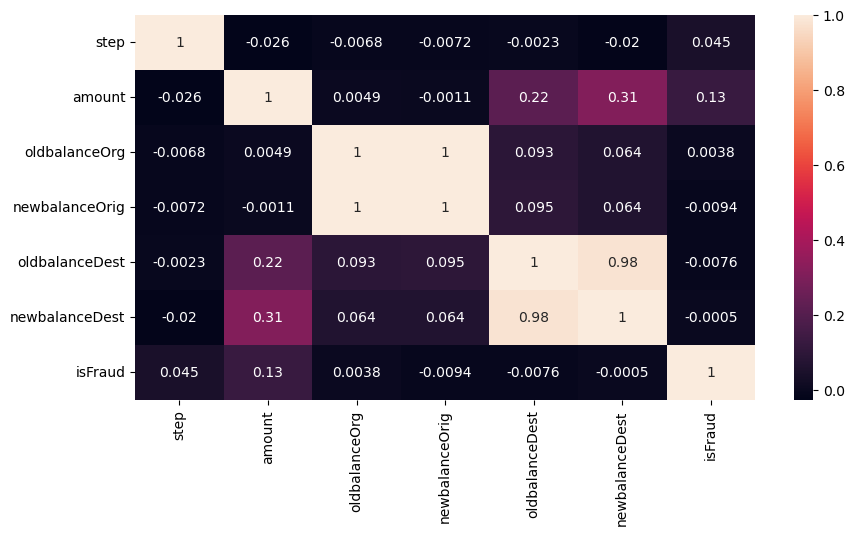

In [25]:
plt.figure(figsize=(10, 5))
corel = on_df.corr()
sns.heatmap(corel, annot=True)

### Building the Model
- Feature Engineering

In [26]:
def typecon(x):
    if x == 'CASH_OUT':
        return 1
    elif x == 'PAYMENT':
        return 2
    elif x == 'CASH_IN':
        return 3
    elif x == 'TRANSFER':
        return 4
    else:
        return 5
    
# Create the new column

on_df['typenum'] = on_df['type'].apply(typecon)   


In [27]:
on_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,step_category,amt_category,oldbalorig_category,oldbaldest_category,trans_category,typenum
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,very quick,very low,moderate,very low,genuine,2
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,very quick,very low,low,very low,genuine,2
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,very quick,very low,very low,very low,fraud,4
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,very quick,very low,very low,low,fraud,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,very quick,very low,low,very low,genuine,2


In [28]:
# The target is the 'isFraud' column which will be y

y = on_df['isFraud']
y

0          0
1          0
2          1
3          1
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: isFraud, Length: 1048575, dtype: int64

In [29]:
on_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,step_category,amt_category,oldbalorig_category,oldbaldest_category,trans_category,typenum
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,very quick,very low,moderate,very low,genuine,2
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,very quick,very low,low,very low,genuine,2
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,very quick,very low,very low,very low,fraud,4
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,very quick,very low,very low,low,fraud,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,very quick,very low,low,very low,genuine,2


### Select the features
- Drop categorical columns including the target 

In [30]:
X = on_df.drop(['step', 'type', 'nameOrig', 'newbalanceOrig', 'nameDest', 'newbalanceDest', 'isFraud', 'step_category', 'amt_category', 'oldbalorig_category', 'oldbaldest_category', 'trans_category'], axis=1)
X.head()

,amount,oldbalanceOrg,oldbalanceDest,typenum
0,9839.64,170136.0,0.0,2
1,1864.28,21249.0,0.0,2
2,181.00,181.0,0.0,4
3,181.00,181.0,21182.0,1
4,11668.14,41554.0,0.0,2


In [31]:
# Confusion Matrix

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# create the model
DC_model = DecisionTreeClassifier()
RF_model = RandomForestClassifier()
KN_model = KNeighborsClassifier()

In [33]:
# split into training and validation sets using 40% split ratio

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4)

In [34]:
# Create a list of your models

models = [DC_model, RF_model, KN_model]

In [35]:
def plot_confusion_matrix(y_valid, prediction):
    cm_ = confusion_matrix(y_valid, prediction)
    plt.figure(figsize = (6, 4))
    sns.heatmap(cm_, cmap = 'coolwarm',
                linecolor = 'white',
                linewidths = 1,
                annot = True,
                fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
# create function to train a model and evaluate accuracy

def trainer(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train) # to fit the model
    prediction = model.predict(X_valid) # predict on the fitted model
    # print evaluation metrics
    print('\n For{}, Accuracy Score is {} \n'.format(model.__class__.__name__, accuracy_score(prediction, y_valid)))
    print(classification_report(prediction, y_valid)) # clssification report for evaluating our models
    plot_confusion_matrix(y_valid, prediction)


 ForDecisionTreeClassifier, Accuracy Score is 0.9991607658012064 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    418964
           1       0.63      0.59      0.61       466

    accuracy                           1.00    419430
   macro avg       0.82      0.79      0.80    419430
weighted avg       1.00      1.00      1.00    419430



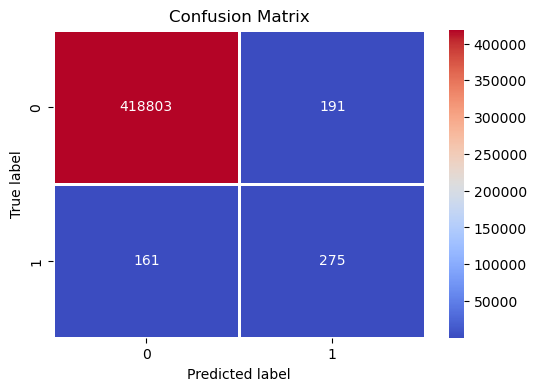


 ForRandomForestClassifier, Accuracy Score is 0.9994683260615598 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419139
           1       0.58      0.87      0.69       291

    accuracy                           1.00    419430
   macro avg       0.79      0.93      0.85    419430
weighted avg       1.00      1.00      1.00    419430



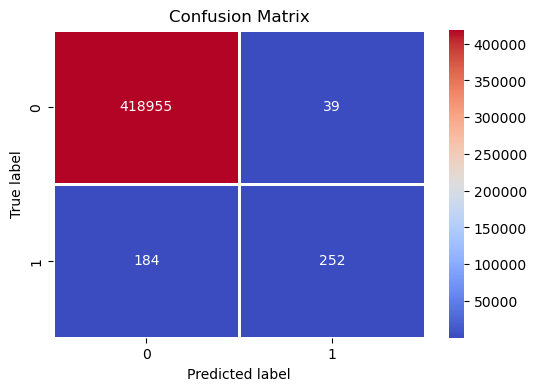

c:\Users\chulu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



 ForKNeighborsClassifier, Accuracy Score is 0.9992918961447679 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419157
           1       0.47      0.75      0.58       273

    accuracy                           1.00    419430
   macro avg       0.74      0.88      0.79    419430
weighted avg       1.00      1.00      1.00    419430



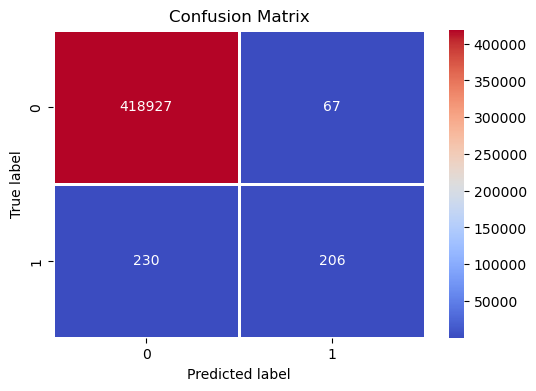

In [38]:
# loop through each model, training in the process

for model in models:
    trainer(model, X_train, y_train, X_valid, y_valid)

In [39]:
columns = np.array([[181.00, 181.0, 0.00, 4 ]])

print(RF_model.predict(columns))

[1]


c:\Users\chulu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


##### Comment of metric evaluation
- The accuracy scores of the three models: Decision Tree and KNeighbors Classifiers each with 99.91% accuracy scores and Random Forest Classifier with 99.94% are very high and shows that all performed extremely well on the dataset. 
- However, the very high accuracy scores could be an indication of overfitting. Therefore, K-Fold Cross validation will be used to validate the reliability of the classifiers' performance.  


##### Using K-Fold Cross Validation to Validate Reliability of the Models

In [40]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

# prepare the cross-validation procedure

cv = KFold(n_splits = 10, random_state = 1, shuffle = True)

In [41]:
# Create a function to train a model with cross validation and evaluate accuracy

def trainer_with_cv(model, X, y):
    '''Cross validation function. Expects a model'''
    scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1) # evaluate model

    print('Accuracy: %.3f' % (mean(scores)))

In [42]:
# train and predict by looping through the list of models

for model in models:
    trainer_with_cv(model, X_train, y_train)

Accuracy: 0.999
Accuracy: 0.999
Accuracy: 0.999


In [43]:
# Create a function to train a model with cross validation and evaluate recall

def trainer_with_cv(model, X, y):
    '''Cross validation function. Expects a model'''
    scores = cross_val_score(model, X, y, scoring = 'recall', cv = cv, n_jobs = -1) # evaluate model

    print('Recall: %.3f' % (mean(scores)))

In [45]:
# train and predict by looping through the list of models

for model in models:
    trainer_with_cv(model, X_train, y_train)

Recall: 0.604
Recall: 0.581
Recall: 0.434


In [48]:
# Create a function to train a model with cross validation and evaluate precision

def trainer_with_cv(model, X, y):
    '''Cross validation function. Expects a model'''
    scores = cross_val_score(model, X, y, scoring = 'precision', cv = cv, n_jobs = -1) # evaluate model

    print('Precision: %.3f' % (mean(scores)))

In [49]:
# train and predict by looping through the list of models

for model in models:
    trainer_with_cv(model, X_train, y_train)

Precision: 0.584
Precision: 0.872
Precision: 0.689


#### Outcome of K-Fold Cross Validation
- The accuracy, recall and precision scores of the classifiers from the K-Fold cross validation i.e.  Decision Tree (0.999, 0.604 & 0.584), Random Forest (0.999, 0.581 & 0.872) and KNeighbor (0.999, 0.434 & 0.689) validates the reliability of the performance of the classifiers and means that the models can generalize on a new or unseen data.

#### Summary of Analysis

- Accuracy: The accuracy scores of the three models are excellent as the results mean that the classifiers are making correct predictions for over 99% of the transactions in the dataset.   
- Recall: After cross validation, Decision Tree Classifier has the highest recall score of 0.604 as against Random Forest and KNeighbors Classifiers with 0.581 and 0.434 respectively. The highest score of 0.604 for Decision Tree Classifier is most desirable especially because of the nature of the problem we are trying to solve which is fraud detection where identifying as much of the  positive cases as possible is crucial. The score means that 60.4% of positive cases were correctly identified by the Decision Tree Classifier while approximately 39.6% of the positive cases were falsely classified as negative (false negatives).
- Precision: Indicates the cases that were actually positive out of those predicted as positive by the classifier. Random Forest had the highest precision score of 0.872 while those of Decision Tree and KNeighbor were 0.584 and 0.689 respectively. The precision of 0.872 means that 87.2% of the transactions predicted as positive were correctly identified by the Random Forest Classifier while 12.8% of transactions predicted as positive were actually negative (i.e. false positive).

#### Conclusion
- The objective was to develop a machine learning model that can predict online payment fraud transactions from a dataset of transactions of a financial institution.
- Due to the nature of fraud, the institution should be more concerned with better results on false negatives. it is desirable that as much of the positive instances are correctly predicted because a single transaction can result to very huge loss to the financial institution.
- The accuracy scores for the three classifiers are practically the same. However, Decision Tree Classifier gave the best performing model in terms of recall of about 60.4% after the K-Fold cross validation that has been done and as such has the lowest percentage of false negatives of 39.6%  
